#### 05 Transfer Learning for Pneumonia Detection

**Goal:**  
Fine-tune and compare several top pre-trained CNN models (ResNet50, DenseNet121, EfficientNetB0, VGG16) for chest X-ray pneumonia classification.

- Input: Preprocessed image data from generators
- Output: Trained transfer learning models, accuracy/comparison plots, and saved models


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0, VGG16
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns


In [2]:
base_dir = '../chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
CLASSES = ['NORMAL', 'PNEUMONIA']

os.makedirs('notebooks\saved_models', exist_ok=True)


In [3]:
# Generic augmentation for all models
train_aug = ImageDataGenerator(
    preprocessing_function=None,  # We'll set this per model
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    fill_mode='reflect'
)
val_test_aug = ImageDataGenerator(preprocessing_function=None)  # Set per model


In [4]:
def build_tl_model(base_model, input_shape=(224,224,3)):
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    preds = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=base_model.input, outputs=preds)
    return model


In [5]:
# Define all transfer learning models with their preprocessing functions
tl_models = [
    {
        'name': 'ResNet50',
        'base': ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)),
        'preprocess': resnet_preprocess
    },
    {
        'name': 'DenseNet121',
        'base': DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3)),
        'preprocess': densenet_preprocess
    },
    {
        'name': 'EfficientNetB0',
        'base': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3)),
        'preprocess': efficientnet_preprocess
    },
    {
        'name': 'VGG16',
        'base': VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)),
        'preprocess': vgg_preprocess
    }
]


58889256/58889256 [==============================] - 189s 3us/step



=== Training ResNet50 ===
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/12


c:\Users\Revanth Kumar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 - 312s - loss: 0.2915 - accuracy: 0.8742 - val_loss: 0.7998 - val_accuracy: 0.6250 - 312s/epoch - 2s/step
Epoch 2/12
163/163 - 324s - loss: 0.1679 - accuracy: 0.9358 - val_loss: 0.4753 - val_accuracy: 0.7500 - 324s/epoch - 2s/step
Epoch 3/12
163/163 - 399s - loss: 0.1422 - accuracy: 0.9452 - val_loss: 0.4206 - val_accuracy: 0.7500 - 399s/epoch - 2s/step
Epoch 4/12
163/163 - 340s - loss: 0.1271 - accuracy: 0.9488 - val_loss: 0.5806 - val_accuracy: 0.7500 - 340s/epoch - 2s/step
Epoch 5/12
163/163 - 333s - loss: 0.1127 - accuracy: 0.9561 - val_loss: 0.3117 - val_accuracy: 0.8750 - 333s/epoch - 2s/step
Epoch 6/12
163/163 - 305s - loss: 0.1096 - accuracy: 0.9588 - val_loss: 0.2728 - val_accuracy: 0.8750 - 305s/epoch - 2s/step
Epoch 7/12
163/163 - 302s - loss: 0.1048 - accuracy: 0.9622 - val_loss: 0.5451 - val_accuracy: 0.7500 - 302s/epoch - 2s/step
Epoch 8/12
163/163 - 299s - loss: 0.0932 - accuracy: 0.9634 - val_loss: 0.2041 - val_accuracy: 0.8750 - 299s/epoch - 2s/step
Epoch 9/12


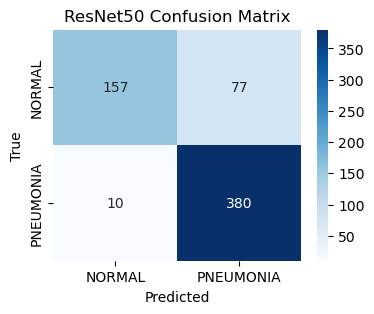

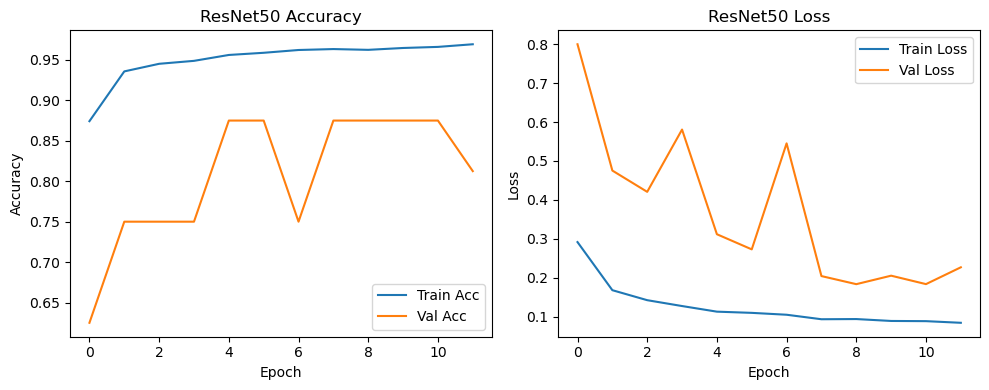


=== Training DenseNet121 ===
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/12


c:\Users\Revanth Kumar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 - 327s - loss: 0.4563 - accuracy: 0.7926 - val_loss: 0.5100 - val_accuracy: 0.6250 - 327s/epoch - 2s/step
Epoch 2/12
163/163 - 325s - loss: 0.2611 - accuracy: 0.8928 - val_loss: 0.4386 - val_accuracy: 0.6250 - 325s/epoch - 2s/step
Epoch 3/12
163/163 - 329s - loss: 0.2129 - accuracy: 0.9158 - val_loss: 0.3243 - val_accuracy: 0.9375 - 329s/epoch - 2s/step
Epoch 4/12
163/163 - 327s - loss: 0.1980 - accuracy: 0.9193 - val_loss: 0.3231 - val_accuracy: 0.9375 - 327s/epoch - 2s/step
Epoch 5/12
163/163 - 326s - loss: 0.1713 - accuracy: 0.9342 - val_loss: 0.3452 - val_accuracy: 0.8125 - 326s/epoch - 2s/step
Epoch 6/12
163/163 - 325s - loss: 0.1669 - accuracy: 0.9337 - val_loss: 0.2733 - val_accuracy: 0.9375 - 325s/epoch - 2s/step
Epoch 7/12
163/163 - 329s - loss: 0.1527 - accuracy: 0.9440 - val_loss: 0.2760 - val_accuracy: 0.9375 - 329s/epoch - 2s/step
Epoch 8/12
163/163 - 328s - loss: 0.1465 - accuracy: 0.9429 - val_loss: 0.2094 - val_accuracy: 0.9375 - 328s/epoch - 2s/step
Epoch 9/12


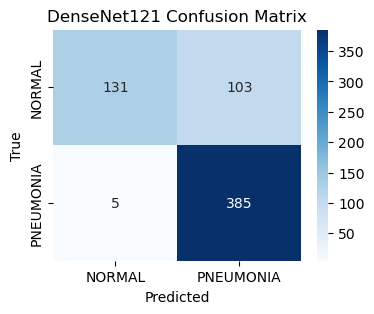

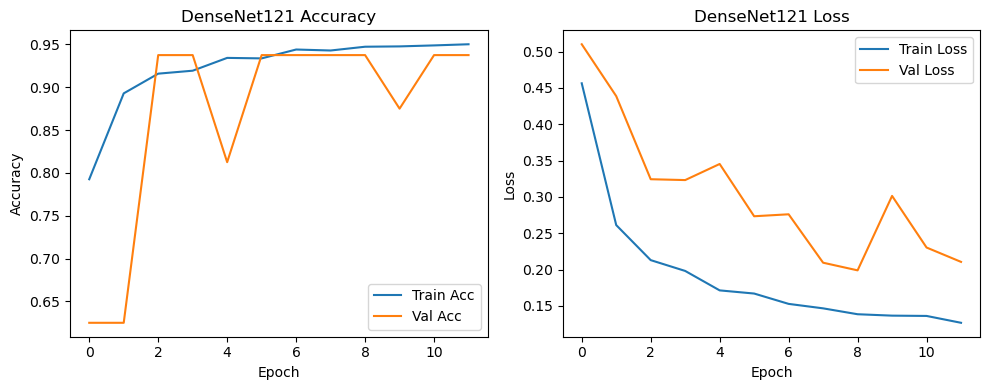


=== Training EfficientNetB0 ===
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/12


c:\Users\Revanth Kumar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 - 219s - loss: 0.3699 - accuracy: 0.8299 - val_loss: 0.4729 - val_accuracy: 0.7500 - 219s/epoch - 1s/step
Epoch 2/12
163/163 - 212s - loss: 0.2376 - accuracy: 0.9022 - val_loss: 0.3691 - val_accuracy: 0.8750 - 212s/epoch - 1s/step
Epoch 3/12
163/163 - 214s - loss: 0.2062 - accuracy: 0.9166 - val_loss: 0.3663 - val_accuracy: 0.8750 - 214s/epoch - 1s/step
Epoch 4/12
163/163 - 210s - loss: 0.1871 - accuracy: 0.9193 - val_loss: 0.2514 - val_accuracy: 0.9375 - 210s/epoch - 1s/step
Epoch 5/12
163/163 - 211s - loss: 0.1744 - accuracy: 0.9294 - val_loss: 0.2290 - val_accuracy: 0.9375 - 211s/epoch - 1s/step
Epoch 6/12
163/163 - 211s - loss: 0.1669 - accuracy: 0.9360 - val_loss: 0.2138 - val_accuracy: 0.9375 - 211s/epoch - 1s/step
Epoch 7/12
163/163 - 213s - loss: 0.1566 - accuracy: 0.9373 - val_loss: 0.1998 - val_accuracy: 0.9375 - 213s/epoch - 1s/step
Epoch 8/12
163/163 - 209s - loss: 0.1508 - accuracy: 0.9413 - val_loss: 0.1345 - val_accuracy: 0.9375 - 209s/epoch - 1s/step
Epoch 9/12


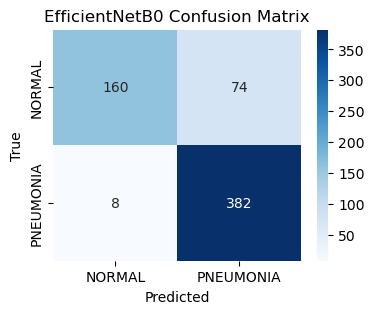

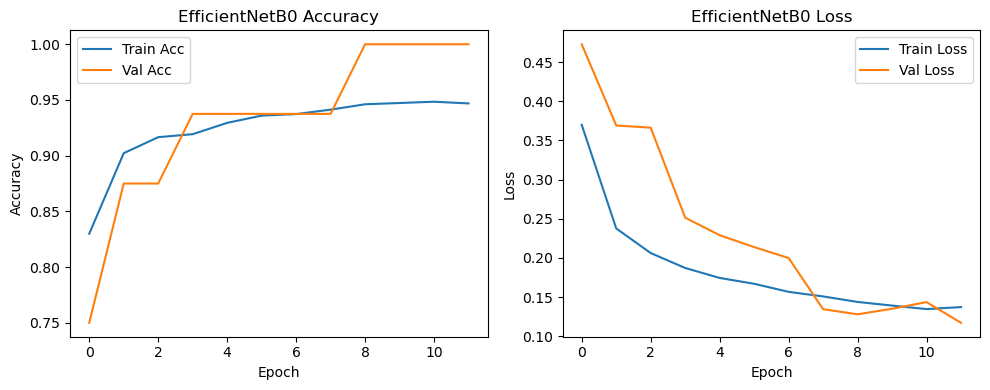


=== Training VGG16 ===
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/12
163/163 - 454s - loss: 0.8365 - accuracy: 0.7605 - val_loss: 1.0220 - val_accuracy: 0.5625 - 454s/epoch - 3s/step
Epoch 2/12


c:\Users\Revanth Kumar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 - 455s - loss: 0.3760 - accuracy: 0.8635 - val_loss: 0.5642 - val_accuracy: 0.6875 - 455s/epoch - 3s/step
Epoch 3/12
163/163 - 1947s - loss: 0.2804 - accuracy: 0.8901 - val_loss: 0.4506 - val_accuracy: 0.8125 - 1947s/epoch - 12s/step
Epoch 4/12
163/163 - 454s - loss: 0.2509 - accuracy: 0.8986 - val_loss: 0.4594 - val_accuracy: 0.7500 - 454s/epoch - 3s/step
Epoch 5/12
163/163 - 5112s - loss: 0.2220 - accuracy: 0.9143 - val_loss: 0.4469 - val_accuracy: 0.8125 - 5112s/epoch - 31s/step
Epoch 6/12
163/163 - 485s - loss: 0.1984 - accuracy: 0.9202 - val_loss: 0.4091 - val_accuracy: 0.7500 - 485s/epoch - 3s/step
Epoch 7/12
163/163 - 2915s - loss: 0.1853 - accuracy: 0.9237 - val_loss: 0.3968 - val_accuracy: 0.8125 - 2915s/epoch - 18s/step
Epoch 8/12
163/163 - 481s - loss: 0.1873 - accuracy: 0.9264 - val_loss: 0.2777 - val_accuracy: 0.8125 - 481s/epoch - 3s/step
Epoch 9/12
163/163 - 811s - loss: 0.1694 - accuracy: 0.9342 - val_loss: 0.4249 - val_accuracy: 0.8125 - 811s/epoch - 5s/step
Ep

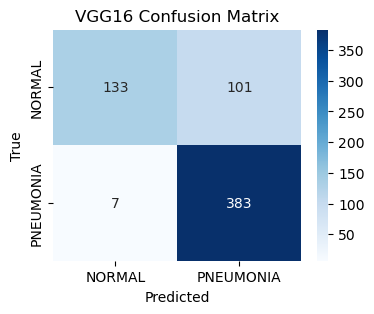

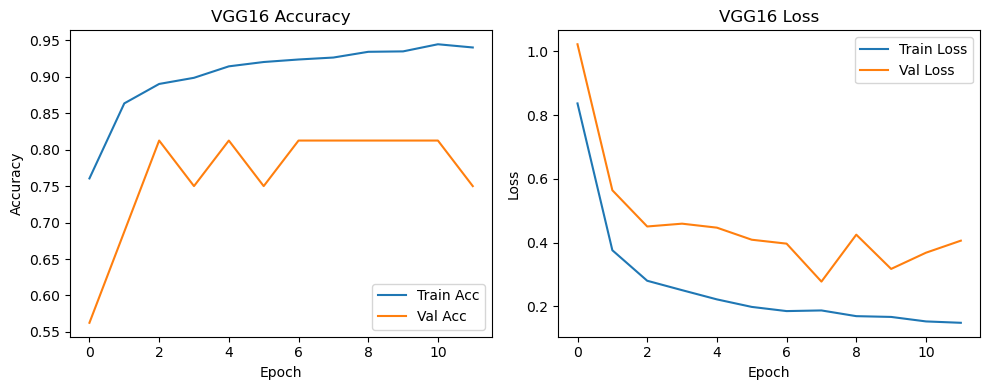

In [6]:
results = []

for model_info in tl_models:
    print(f"\n=== Training {model_info['name']} ===")
    # Set train and validation generators with correct preprocessing
    train_gen = ImageDataGenerator(
        preprocessing_function=model_info['preprocess'],
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.01,
        zoom_range=[0.9, 1.25],
        horizontal_flip=True,
        fill_mode='reflect'
    ).flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=True
    )

    val_gen = ImageDataGenerator(
        preprocessing_function=model_info['preprocess']
    ).flow_from_directory(
        val_dir,
        target_size=IMG_SIZE,
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    test_gen = ImageDataGenerator(
        preprocessing_function=model_info['preprocess']
    ).flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    # Build model
    base_model = model_info['base']
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers for transfer learning

    model = build_tl_model(base_model, input_shape=(224,224,3))
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks
    checkpoint_path = f"models/saved/{model_info['name'].lower()}_best.h5"
    early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
    checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')

    # Train model
    history = model.fit(
        train_gen,
        epochs=12,
        validation_data=val_gen,
        callbacks=[early_stop, checkpoint],
        verbose=2
    )

    # Evaluate on test set
    test_gen.reset()
    y_prob = model.predict(test_gen, verbose=1)
    y_pred = (y_prob > 0.5).astype(int).flatten()
    y_true = test_gen.classes
    acc = np.mean(y_pred == y_true)
    auc = roc_auc_score(y_true, y_prob)
    print(classification_report(y_true, y_pred, target_names=CLASSES))
    cm = confusion_matrix(y_true, y_pred)

    # Save results
    results.append({
        'Model': model_info['name'],
        'Accuracy': acc,
        'AUC': auc,
        'Classification Report': classification_report(y_true, y_pred, target_names=CLASSES, output_dict=True),
        'Confusion Matrix': cm
    })

    # Plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_info["name"]} Confusion Matrix')
    plt.show()

    # Plot training curves
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_info["name"]} Accuracy')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_info["name"]} Loss')
    plt.tight_layout()
    plt.show()


In [8]:
# Summary DataFrame
import pandas as pd
summary = []
for r in results:
    summary.append({
        'Model': r['Model'],
        'Accuracy': r['Accuracy'],
        'AUC': r['AUC'],
        'Precision': r['Classification Report']['weighted avg']['precision'],
        'Recall': r['Classification Report']['weighted avg']['recall'],
        'F1-score': r['Classification Report']['weighted avg']['f1-score']
    })
df_summary = pd.DataFrame(summary)
df_summary = df_summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df_summary


,Model,Accuracy,AUC,Precision,Recall,F1-score
0,EfficientNetB0,0.868590,0.958503,0.880717,0.868590,0.862928
1,ResNet50,0.860577,0.959796,0.872239,0.860577,0.854444
2,DenseNet121,0.826923,0.956301,0.854297,0.826923,0.813661
3,VGG16,0.826923,0.959752,0.850826,0.826923,0.814480
